In [1]:
import numpy
%matplotlib inline

# SYDE 522 Assignment 2
## Clustering and SVMs

### Due: Friday Oct 20 at 11:59pm

As with all the assignments in this course, this assignment is structured as a Jupyter Notebook and uses Python.  If you do not have Python and Jupyter Notebook installed, the easiest method is to download and install Anaconda https://www.anaconda.com/download.  There is a quick tutorial for running Jupyter Notebook from within Anacoda at https://docs.anaconda.com/free/anaconda/getting-started/hello-world/#python-exercise-jupyter under "Run Python in a Jupyter Notebook"

Implement your assignment directly in the Jupyter notebook and submit your resulting Jupyter Notebook file using Learn.

While you are encouraged to talk about the assignment with your classmates, you must write and submit your own assignment.  Directly copying someone else's assignment and changing a few small things here and there does not count as writing your own assignment.

Make sure to label the axes on all of your graphs.


### Question 1

**a) [2 marks]** The following code generates the same data that was used to demonstrate K-means clustering in class.  Note that since this question is about clustering, which is an unsupervised technique, we will not be using the `y` variable and will instead just use `x`, which will have 500 data points, each of which is two-dimensional.

```python
import sklearn.datasets
x, y = sklearn.datasets.make_blobs(
    n_samples=500, cluster_std=[1,2,0.5], random_state=8
)
```

Implement K-means clustering on this data, with k=3.  Run enough iterations for it to converge to a stable classification (probably around 4-5 iterations).  Generate a scatterplot that shows each learned category in a different colour.  For example, if you have an array `output` which contains the learned category for each item and those values were `0`, `1`, and `2`, you could generate the plot with the following code:  

```python
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(6,6))
plt.scatter(x[output==0,0], x[output==0,1], label='category 0')
plt.scatter(x[output==1,0], x[output==1,1], label='category 1')
plt.scatter(x[output==2,0], x[output==2,1], label='category 2')
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()
```

The number of iterations: 4


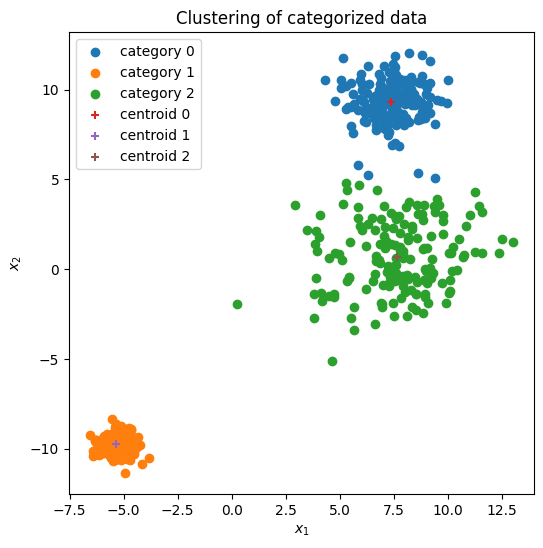

In [31]:
import sklearn.datasets
import matplotlib.pyplot as plt
import numpy

x, y = sklearn.datasets.make_blobs(
    n_samples=500, cluster_std=[1,2,0.5], random_state=8
)

def distance(point1, point2):
    return numpy.sqrt(pow(point1[0]-point2[0],2) + pow(point1[1]-point2[1],2))

def centroid(array):
    array = numpy.array(array)
    return array.mean(axis=0)

cent1 = x[numpy.random.randint(low=0,high=len(x)-1)]
cent2 = x[numpy.random.randint(low=0,high=len(x)-1)]
cent3 = x[numpy.random.randint(low=0,high=len(x)-1)]
proto1,proto2,proto3 = [],[],[]
p1size,p2size,p3size = 0,0,0
iterations = 0
output = numpy.zeros(500)

while True:
    for a in range(len(x)):
        if distance(x[a],cent1)<distance(x[a],cent2) and distance(x[a],cent1)<distance(x[a],cent3):
            proto1.append(x[a])
            output[a] = 0
        elif distance(x[a],cent2)<distance(x[a],cent1) and distance(x[a],cent2)<distance(x[a],cent3):
            proto2.append(x[a])
            output[a] = 1
        elif distance(x[a],cent3)<distance(x[a],cent1) and distance(x[a],cent3)<distance(x[a],cent2):
            proto3.append(x[a])
            output[a] = 2
    cent1,cent2,cent3 = centroid(proto1),centroid(proto2),centroid(proto3)
    if p1size == len(proto1) and p2size == len(proto2) and p3size == len(proto3):
        break
    p1size,p2size,p3size = len(proto1),len(proto2),len(proto3)
    proto1,proto2,proto3 = [],[],[]
    iterations += 1
    
print('The number of iterations:', iterations)
plt.figure(figsize=(6,6))
plt.title('Clustering of categorized data')
plt.scatter(x[output==0,0], x[output==0,1], label='category 0')
plt.scatter(x[output==1,0], x[output==1,1], label='category 1')
plt.scatter(x[output==2,0], x[output==2,1], label='category 2')
plt.scatter(cent1[0],cent1[1], label='centroid 0', marker='+')
plt.scatter(cent2[0],cent2[1], label='centroid 1', marker='+')
plt.scatter(cent3[0],cent3[1], label='centroid 2', marker='+')
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()


**b) [1 mark]** For the same model you ran in part a), compute the "Loss" as the model is learning.  The Loss is defined as $\sqrt{{1 \over N}\sum_k \sum_i (x_i-c_k)^2}$, where N is the number of items (500), the sum over $k$ is over the 3 categories, the sum over $i$ is over the items in the current category, $x_i$ is the item itself, and $c_k$ is the prototype item for that category.  Compute the Loss after zero iterations (i.e. for the initial randomly chosen prototypes), and then after each iteration of the k-means clustering algorithm.  Generate a plot with the number of iterations on the x-axis and the Loss on the y-axis.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The number of iterations: 3


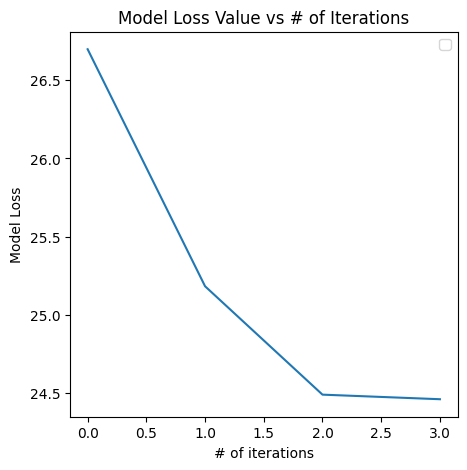

In [118]:
import sklearn.datasets
import matplotlib.pyplot as plt
import numpy

x, y = sklearn.datasets.make_blobs(
    n_samples=500, cluster_std=[1,2,0.5], random_state=8
)

def lossf(n,array1,array2):
    summation = 0
    for a in array1:
        psum = 0
        for b in array2:
            psum += pow(b[0]-a[0],2) + pow(b[1]-a[1],2)
        summation += psum
    summation = summation/n
    return numpy.sqrt(summation)

def distance(point1, point2):
    return numpy.sqrt(pow(point1[0]-point2[0],2) + pow(point1[1]-point2[1],2))

def centroid(array):
    array = numpy.array(array)
    return array.mean(axis=0)

cent1 = x[numpy.random.randint(low=0,high=len(x)-1)]
cent2 = x[numpy.random.randint(low=0,high=len(x)-1)]
cent3 = x[numpy.random.randint(low=0,high=len(x)-1)]
proto1,proto2,proto3, mloss, allcents = [],[],[],[],[]
p1size,p2size,p3size = 0,0,0
iterations = 0
output = numpy.zeros(500)

while True:
    allcents.append(cent1)
    allcents.append(cent2)
    allcents.append(cent3)
    mloss.append(lossf(500,allcents,x))
    for a in range(len(x)):
        if distance(x[a],cent1)<distance(x[a],cent2) and distance(x[a],cent1)<distance(x[a],cent3):
            proto1.append(x[a])
            output[a] = 0
        elif distance(x[a],cent2)<distance(x[a],cent1) and distance(x[a],cent2)<distance(x[a],cent3):
            proto2.append(x[a])
            output[a] = 1
        elif distance(x[a],cent3)<distance(x[a],cent1) and distance(x[a],cent3)<distance(x[a],cent2):
            proto3.append(x[a])
            output[a] = 2
    cent1,cent2,cent3 = centroid(proto1),centroid(proto2),centroid(proto3)
    if p1size == len(proto1) and p2size == len(proto2) and p3size == len(proto3):
        break
    p1size,p2size,p3size = len(proto1),len(proto2),len(proto3)
    proto1,proto2,proto3,allcents = [],[],[],[]
    iterations += 1

xiter = []
for c in range(iterations+1):
    xiter.append(c)
    
print('The number of iterations:', iterations)
plt.figure(figsize=(5,5))
plt.plot(xiter,mloss)
plt.legend()
plt.xlabel('# of iterations')
plt.ylabel('Model Loss')
plt.title('Model Loss Value vs # of Iterations')
plt.show()


**c) [1 mark]** Perform k-means clustering on the same data, but for values of k between 1 and 14, inclusive.  For each k-value perform enough iterations for the clustering to be stable.  After it is stable, compute the Loss.  Generate a plot with the value of k on the x-axis, and the Loss on the y-axis.

Given this plot, what is a good value for k?  Why?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


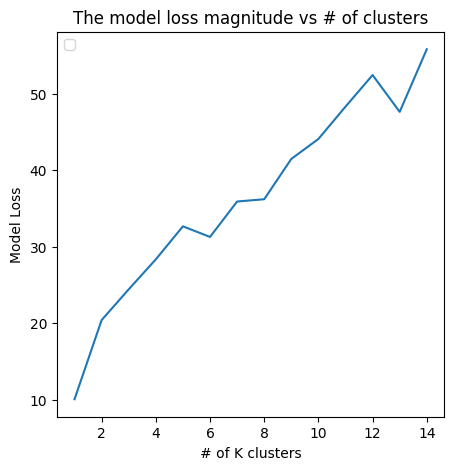

In [30]:
import sklearn.datasets
import matplotlib.pyplot as plt
import numpy
import math

x, y = sklearn.datasets.make_blobs(
    n_samples=500, cluster_std=[1,2,0.5], random_state=8
)

def lossf(n,array1,array2):
    summation = 0
    for a in array1:
        for b in array2:
            summation += pow(b[0]-a[0],2) + pow(b[1]-a[1],2)
    summation = summation/n
    return numpy.sqrt(summation)

def distance(point1, point2):
    return numpy.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def centroid(array):
    array = numpy.array(array)
    return array.mean(axis=0)

def smallestd(point1, array):
    distances = [distance(point1, l) for l in array]
    return distances.index(min(distances))
            
k = [c+1 for c in range(14)]
kloss = []
for d in k:
    centroids,protosize,prototypes = [],[0 for _ in range(d)],[[] for _ in range(d)]
    output = numpy.zeros(500)
    for e in range(d):
        centroids.append(x[math.ceil(numpy.random.random() * numpy.random.randint(low=0, high=len(x)-1))])
    while True:
        for a in range(len(x)):
            pnumber = smallestd(x[a],centroids)
            prototypes[pnumber].append(x[a])
            output[a] = pnumber
        for g in range(d):
            centroids[g] = centroid(prototypes[g])
        stable = False
        for h in range(d):
            all_matched = True
            if protosize[h] != len(prototypes[h]):
                all_matched = False
                
            stable = True if all_matched else False
        protosize = []
        if stable:
            break
        for f in range(d):
            protosize.append(len(prototypes[f]))
        prototypes = [[] for _ in range(d)]
    kloss.append(lossf(500,centroids,x))

plt.figure(figsize=(5,5))
plt.title('The model loss magnitude vs # of clusters')
plt.plot(k,kloss)
plt.legend()
plt.xlabel('# of K clusters')
plt.ylabel('Model Loss')
plt.show()


Based on the graph above, the model loss continues to grow above k=3 and decreases below k=3. However, just because k=1 clusters produces the smallest loss value, it also categorizes all points into one cluster, which isn't our intention. From our data visibly shown in Question 1a, in conjuction with the plot shown above, k=3 remains our optimal k value since there is 3 distinct groups in our data, and increasing the amount of clusters from that point on will only increase our model's loss.

### Question 2:


**a) [1 mark]** The pre-written implementation of k-means clustering can be used with the following commands:

```python
import sklearn.cluster
kmeans = sklearn.cluster.KMeans(n_clusters=3)
kmeans.fit(x)
output = kmeans.predict(x)
```

Use this implementation of k-means clustering to repeat question 1a) and generate the same plot.

C:\Users\amoli\SYDE522 Projects\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


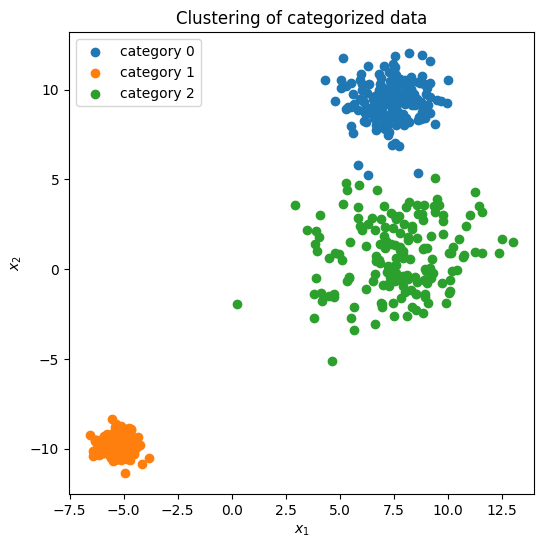

In [32]:
import sklearn.datasets
import matplotlib.pyplot as plt
import numpy as np

x, y = sklearn.datasets.make_blobs(
    n_samples=500, cluster_std=[1,2,0.5], random_state=8
)

import sklearn.cluster
kmeans = sklearn.cluster.KMeans(n_clusters=3)
kmeans.fit(x)
output = kmeans.predict(x)

plt.figure(figsize=(6,6))
plt.title('Clustering of categorized data')
plt.scatter(x[output==0,0], x[output==0,1], label='category 0')
plt.scatter(x[output==1,0], x[output==1,1], label='category 1')
plt.scatter(x[output==2,0], x[output==2,1], label='category 2')
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

**b) [1 mark]** The digit image dataset that was used in assignment 1 can be loaded with the following commands:

```python
import sklearn.datasets
digits = sklearn.datasets.load_digits()
x = digits.data
```

Use the `sklearn` implementation of k-means clustering to form 10 categories from this data.  Plot the results, using the following code which will show the first 12 items in each of the 10 categories.

```python
plt.figure(figsize=(12,12))
for i in range(10):
    indices = np.where(output==i)[0]
    for j,index in enumerate(indices[:12]):
        plt.subplot(10,12,i*12+j+1)
        plt.imshow(digits.data[index].reshape(8,8), cmap='gray_r')
        plt.xticks([])
        plt.yticks([])
        if j==0:
            plt.ylabel(f'category {i}')
plt.show()
```

How does this clustering compare to the natural clustering into the 10 digits that a person might apply to this same data?  What similarities and differences do you see?  (Note: you don't need a quantitative answer to this question; I'm looking for more qualitative answers).

C:\Users\amoli\SYDE522 Projects\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


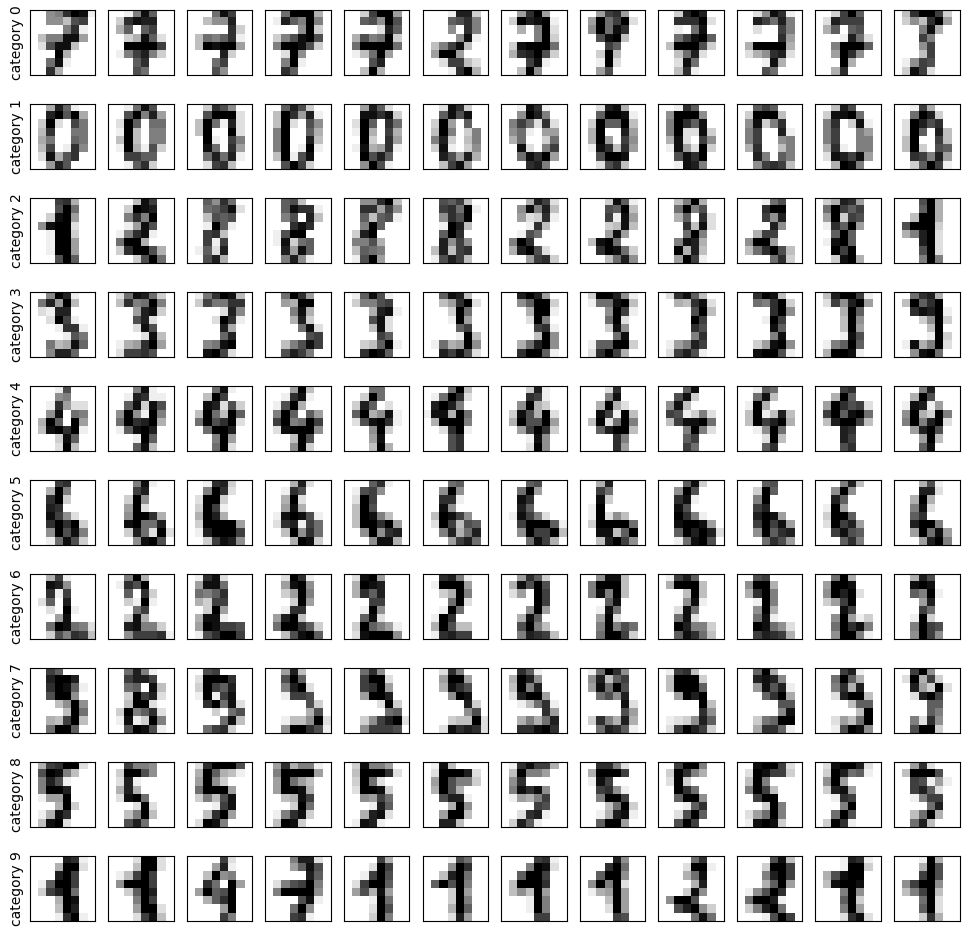

In [5]:
import sklearn.datasets
digits = sklearn.datasets.load_digits()
x = digits.data

import sklearn.cluster
kmeans = sklearn.cluster.KMeans(n_clusters=10)
kmeans.fit(x)
output = kmeans.predict(x)

plt.figure(figsize=(12,12))
for i in range(10):
    indices = np.where(output==i)[0]
    for j,index in enumerate(indices[:12]):
        plt.subplot(10,12,i*12+j+1)
        plt.imshow(digits.data[index].reshape(8,8), cmap='gray_r')
        plt.xticks([])
        plt.yticks([])
        if j==0:
            plt.ylabel(f'category {i}')
plt.show()

The clustering of numbers into 10 categories seems to be quite accurate, as certain categories (like category 3,6,8) are all consistent. In large part, the model seems to identifying pixel density groups and grouping alike data to be placed within a category. The human eye can pickup slight indifferences like the singular '2' in category 0 even though the rest of the values are '7'.

**c) [1 mark]** The following code will perform Hierarchical Clustering (also known as Agglomerative Clustering).  Apply this to the digits data from the previous question and generate the same plot.

```python
agglom = sklearn.cluster.AgglomerativeClustering(n_clusters=10)
agglom.fit(digits.data)
output = agglom.labels_
```

How does this clustering compare to the natural clustering into 10 digits and to the clustering in part b)?  What similarities and differences do you see?

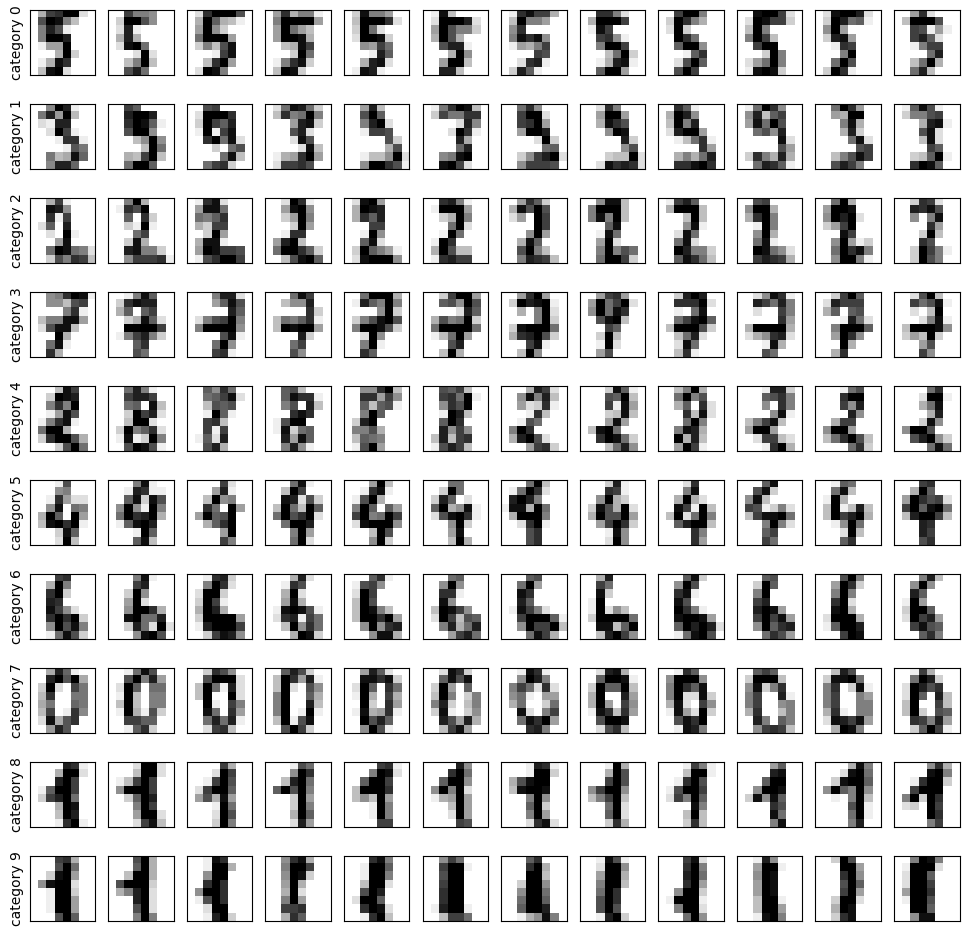

In [4]:
import sklearn.datasets
digits = sklearn.datasets.load_digits()
x = digits.data

agglom = sklearn.cluster.AgglomerativeClustering(n_clusters=10)
agglom.fit(x)
output = agglom.labels_

plt.figure(figsize=(12,12))
for i in range(10):
    indices = np.where(output==i)[0]
    for j,index in enumerate(indices[:12]):
        plt.subplot(10,12,i*12+j+1)
        plt.imshow(digits.data[index].reshape(8,8), cmap='gray_r')
        plt.xticks([])
        plt.yticks([])
        if j==0:
            plt.ylabel(f'category {i}')
plt.show()


The hierarchal clustering seems to be more consistent across the board when fitting data into categories than 2b. Distinctive data like 0s, 5s, 6s, 1s are categorized perfectly, but the model has more trouble than 2b's answer when it comes to categorizing 2,3,7,8,9s. Something that is apparently different from 2b, there are two separate categories for 1s, which are category 8 and 9. With the trouble of differntiating the 2,3,7,8,9s, I'd expect that the original clustering had a better accuracy on this dataset.

### Question 3:

**a) [2 marks]** The following code generates the data used to demonstrate the SVM in class (notice that the two categories are now `1` and `-1` rather than `1` and `0`).

```python
x, y = sklearn.datasets.make_blobs(centers=[[-2, -2], [2, 2]], 
                                   cluster_std=[0.3, 1.5], 
                                   random_state=0, 
                                   n_samples=200, 
                                   n_features=2)
y[y==0] = -1
```

Implement the version of the SVM with a learning rule.  This is the version where we modify the Perceptron learning rule to produce a new learning rule that will try to minimize $\omega$ while trying to keep one category with $\omega\cdot x +b>1$ and the other with $\omega\cdot x + b < -1$.  Apply it to the data generated above.  Use a learning rate of 0.01 and a $\lambda$ value of 0.001.  Initialize it with $\omega=[0,0]$ and $b=0$.  Perform 200 iterations of the learning rule through all the data points (so the learning rule will be applied a total of 200 x 200 = 40000 times).  This should be enough for it to stablize to the optimal decision boundary.

Generate a scatterplot showing the results.  This should show the data points, coloured differently for the two categories.  Also report the final $\omega$ and $b$ values.  In addition, plot the decision boundary line $\omega\cdot x +b=0$ along with the two other boundary lines $\omega\cdot x +b=1$ and $\omega\cdot x +b=-1$.  One way to generate those lines is to use the following code:

```python
xx = np.array([-4, 8])
yy = (b-xx*w0) / w1
yy_upper = ((b+1)-xx*w0) / w1
yy_lower = ((b-1)-xx*w0) / w1
plt.plot(xx, yy)
plt.plot(xx, yy_upper)
plt.plot(xx, yy_lower)
plt.xlim(-3, 6)
plt.ylim(-3, 6)
```

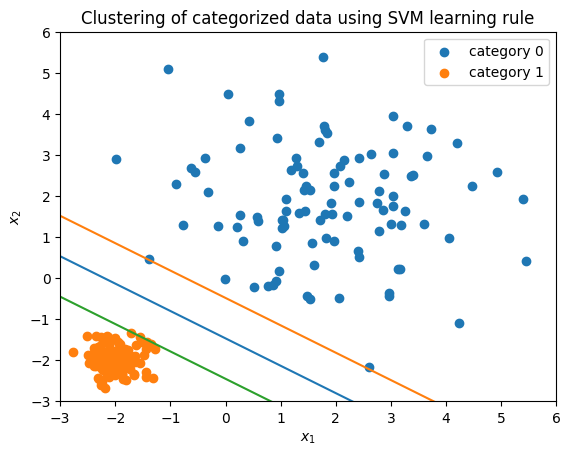

weights: [0.6770305207564846, 1.0156832318594917]
bias: 1.490000000000001


In [33]:
import numpy
import sklearn.datasets
import matplotlib.pyplot as plt
x, y = sklearn.datasets.make_blobs(centers=[[-2, -2], [2, 2]], 
                                   cluster_std=[0.3, 1.5], 
                                   random_state=0, 
                                   n_samples=200, 
                                   n_features=2)

def pred(inputs, weight, b, y):
    summation = numpy.dot(inputs,weight) + b
    summation = summation*y
    if summation > 1:
        return 1
    else:
        return -1

y[y==0] = -1
weights = [0,0]
b = 0
lr = 0.00001
lam = 1000
output = numpy.zeros(200)
for i in range(200):
    for a in range(len(x)):
        if pred(x[a],weights,b, y[a]) >= 1:
            weights[0] += -1*lr*weights[0]
            weights[1] += -1*lr*weights[1]
        else:
            weights[0] += -1*lr*weights[0] + lr*lam*y[a]*x[a,0]
            weights[1] += -1*lr*weights[1] + lr*lam*y[a]*x[a,1]
            b += lr*lam*y[a]

for g in range(200):
    output[g] = numpy.sign(numpy.dot(weights,x[g]) + b)
    
xx = numpy.array([-4, 8])

yy = (-b-xx*weights[0]) / weights[1]
yy_upper = ((-b+1)-xx*weights[0]) / weights[1]
yy_lower = ((-b-1)-xx*weights[0]) / weights[1]

plt.scatter(x[output==1,0], x[output==1,1], label='category 0')
plt.scatter(x[output==-1,0], x[output==-1,1], label='category 1')
plt.title('Clustering of categorized data using SVM learning rule')
plt.legend()
plt.xlim(-3, 6)
plt.ylim(-3, 6)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.plot(xx, yy)
plt.plot(xx, yy_upper)
plt.plot(xx, yy_lower)
plt.show()

print("weights:", weights)
print("bias:", b)

|**b) [1 mark]** For the SVM you implemented in part a), plot the magnitude of $\omega$ over the 200 interations (i.e. plot the initial value of $|\omega|=\sqrt{\omega_0^2+\omega_1^2}$, the value after applying the learning rule to each data point once, the value after applying it to each data point twice, and so on up to 200 times).  Does the resulting value for $\omega$ converge?  

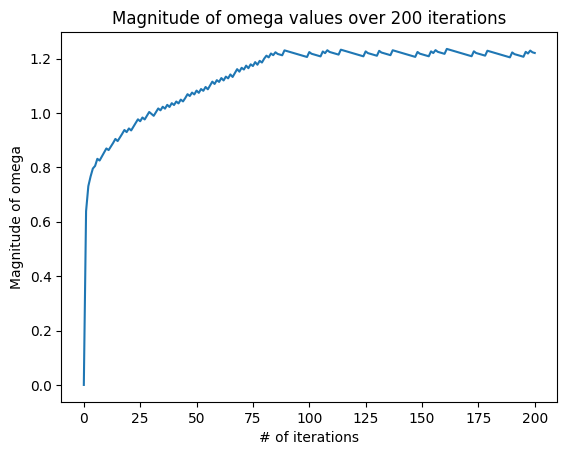

In [35]:
import numpy
import sklearn.datasets
import matplotlib.pyplot as plt
x, y = sklearn.datasets.make_blobs(centers=[[-2, -2], [2, 2]], 
                                   cluster_std=[0.3, 1.5], 
                                   random_state=0, 
                                   n_samples=200, 
                                   n_features=2)

def pred(inputs, weight, b, y):
    summation = numpy.dot(inputs,weight) + b
    summation = summation*y
    if summation > 1:
        return 1
    else:
        return -1

y[y==0] = -1
weights = [0,0]
b = 0
lr = 0.00001
lam = 1000
omega = [0]

for i in range(200):
    for a in range(len(x)):
        if pred(x[a],weights,b, y[a]) >= 1:
            weights[0] += -1*lr*weights[0]
            weights[1] += -1*lr*weights[1]
        else:
            weights[0] += -1*lr*weights[0] + lr*lam*y[a]*x[a,0]
            weights[1] += -1*lr*weights[1] + lr*lam*y[a]*x[a,1]
            b += lr*lam*y[a]
    omega.append(numpy.sqrt(weights[0]**2+weights[1]**2))

w = [c for c in range(201)]
plt.title('Magnitude of omega values over 200 iterations')
plt.xlabel('# of iterations')
plt.ylabel('Magnitude of omega')
plt.plot(w,omega)



The magnitude of omega starts to converge after ~90 iterations and remains near a value of 1.2 for the rest of the 200 iterations.

**c) [1 mark]** The following code generates the data set with two circles, one inside the other.

```python
x, y = sklearn.datasets.make_circles(n_samples=100, 
                                     shuffle=True, 
                                     noise=0.1, 
                                     random_state=0, 
                                     factor=0.3)
```

Apply your implementation of the SVM to this data and plot the result after 100 iterations.  Use the same parameters as before and generate the same plot as in part a).

-1.0772375648750934
-0.3373783793295604


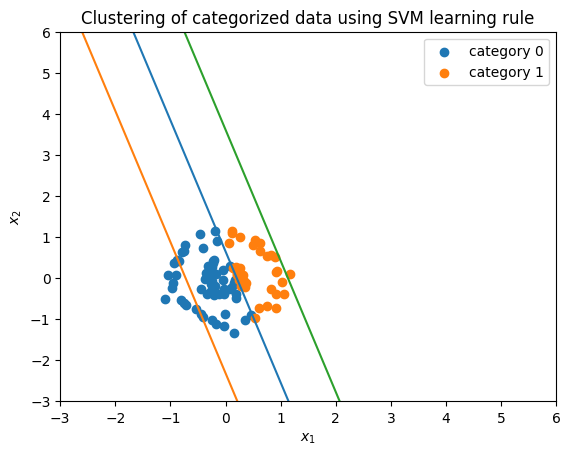

weights: [-1.0772375648750934, -0.3373783793295604]
bias: 0.22000000000000003


In [36]:
import numpy
import sklearn.datasets
import matplotlib.pyplot as plt
x, y = sklearn.datasets.make_circles(n_samples=100, 
                                     shuffle=True, 
                                     noise=0.1, 
                                     random_state=0, 
                                     factor=0.3)

def pred(inputs, weight, b, y):
    summation = numpy.dot(inputs,weight) + b
    summation = summation*y
    if summation > 1:
        return 1
    else:
        return -1

y[y==0] = -1
weights = [0,0]
b = 0
lr = 0.00001
lam = 1000
output = numpy.zeros(100)

for i in range(100):
    for a in range(len(x)):
        if pred(x[a],weights,b, y[a]) >= 1:
            weights[0] += -1*lr*weights[0]
            weights[1] += -1*lr*weights[1]
        else:
            weights[0] += -1*lr*weights[0] + lr*lam*y[a]*x[a,0]
            weights[1] += -1*lr*weights[1] + lr*lam*y[a]*x[a,1]
            b += lr*lam*y[a]

for g in range(100):
    output[g] = numpy.sign(numpy.dot(weights,x[g]) + b)
    
xx = numpy.array([-4, 8])

print(weights[0])
print(weights[1])
yy = (-b-xx*weights[0]) / weights[1]
yy_upper = ((-b+1)-xx*weights[0]) / weights[1]
yy_lower = ((-b-1)-xx*weights[0]) / weights[1]

plt.scatter(x[output==1,0], x[output==1,1], label='category 0')
plt.scatter(x[output==-1,0], x[output==-1,1], label='category 1')
plt.legend()
plt.title('Clustering of categorized data using SVM learning rule')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim(-3, 6)
plt.ylim(-3, 6)
plt.plot(xx, yy)
plt.plot(xx, yy_upper)
plt.plot(xx, yy_lower)
plt.show()

print("weights:", weights)
print("bias:", b)

**d) [1 mark]** Repeat part c) but augment the data so that there is an additional feature computed as $x_1^2+x_2^2$.  This should make it possible for the SVM to learn a boundary between the datasets in the new 3-dimensional space.

Plot the resulting classification.  You just need to plot the data points, coloured by which category they are in.  You do not need to plot the decision boundaries.

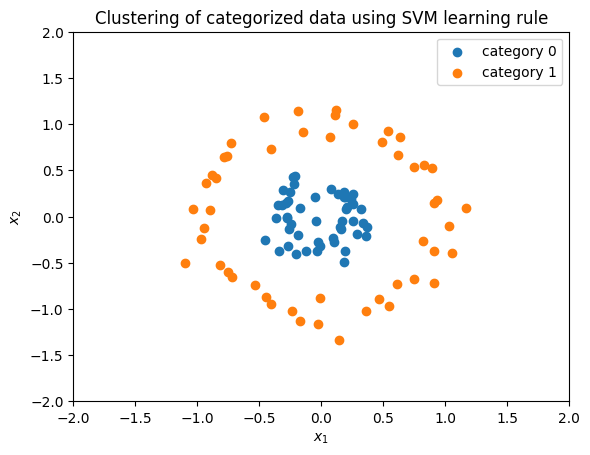

weights: [-0.11683117080339536, -0.1210129933119426, -3.9215274730668517]
bias: 1.9800000000000015


In [37]:
import numpy
import sklearn.datasets
import matplotlib.pyplot as plt
x, y = sklearn.datasets.make_circles(n_samples=100, 
                                     shuffle=True, 
                                     noise=0.1, 
                                     random_state=0, 
                                     factor=0.3)

def pred(inputs, weight, b, y):
    summation = numpy.dot(inputs,weight) + b
    summation = summation*y
    if summation > 1:
        return 1
    else:
        return -1

feature = x[:, 0]**2 + x[:, 1]**2
x = numpy.column_stack((x,feature))

y[y==0] = -1
weights = [0,0,0]
b = 0
lr = 0.00001
lam = 1000
output = numpy.zeros(100)

for i in range(100):
    for a in range(len(x)):
        if pred(x[a],weights,b, y[a]) >= 1:
            weights[0] += -1*lr*weights[0]
            weights[1] += -1*lr*weights[1]
            weights[2] += -1*lr*weights[2]
        else:
            weights[0] += -1*lr*weights[0] + lr*lam*y[a]*x[a,0]
            weights[1] += -1*lr*weights[1] + lr*lam*y[a]*x[a,1]
            weights[2] += -1*lr*weights[2] + lr*lam*y[a]*x[a,2]
            b += lr*lam*y[a]

for g in range(100):
    output[g] = numpy.sign(numpy.dot(weights,x[g]) + b)
    
plt.scatter(x[output==1,0], x[output==1,1], label='category 0')
plt.scatter(x[output==-1,0], x[output==-1,1], label='category 1')
plt.legend()
plt.title('Clustering of categorized data using SVM learning rule')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

print("weights:", weights)
print("bias:", b)

### Question 4:

**a) [1 mark]** The `sklearn` implementation of a Linear SVM (i.e. one with using the Kernel Trick) can be used as follows:

```python
svm = sklearn.svm.LinearSVC(C=1)
svm.fit(x, y)
output = svm.predict(x)
value = svm.decision_function(x)
```

(note that we use `predict` if we want the output to indicate a category label, but we use `decision_function` to get the value of $\omega \cdot x + b$)

Use this implementation to repeat question 3a.  Use a cost `C=100`.  Instead of plotting the decision boundary lines, use the following code to compute the output for a big grid of data points and plot the output as an image (as was done in class):

```python
extent = (-3, 6, -3, 6)
G = 200
XX, YY = np.meshgrid(np.linspace(extent[2],extent[3],G), np.linspace(extent[0],extent[1],G))
pts = np.vstack([YY.flatten(), XX.flatten()]).T
output_pts = svm.decision_function(pts)
im = plt.imshow(output_pts.reshape((G,G)).T, vmin=-1, vmax=1, cmap='RdBu',
                extent=(extent[0], extent[1], extent[3], extent[2]))
```

C:\Users\amoli\SYDE522 Projects\venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\amoli\SYDE522 Projects\venv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


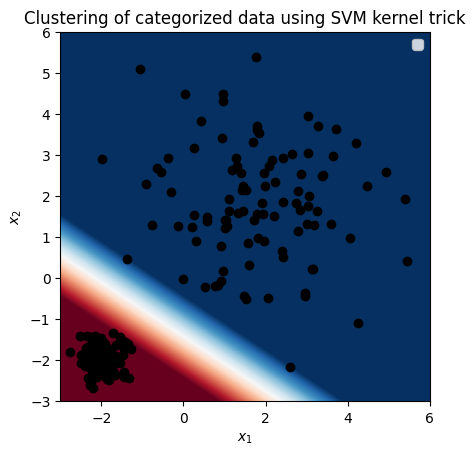

In [38]:
import sklearn.svm

x, y = sklearn.datasets.make_blobs(centers=[[-2, -2], [2, 2]], 
                                   cluster_std=[0.3, 1.5], 
                                   random_state=0, 
                                   n_samples=200, 
                                   n_features=2)
y[y==0] = -1

svm = sklearn.svm.LinearSVC(C=100)
svm.fit(x, y)
output = svm.predict(x)
value = svm.decision_function(x)

extent = (-3, 6, -3, 6)
G = 200
XX, YY = numpy.meshgrid(numpy.linspace(extent[2],extent[3],G), numpy.linspace(extent[0],extent[1],G))
pts = numpy.vstack([YY.flatten(), XX.flatten()]).T
output_pts = svm.decision_function(pts)
im = plt.imshow(output_pts.reshape((G,G)).T, vmin=-1, vmax=1, cmap='RdBu',
                extent=(extent[0], extent[1], extent[3], extent[2]))

plt.scatter(x[:,0], x[:,1], c='black')
plt.legend()
plt.title('Clustering of categorized data using SVM kernel trick')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim(-3, 6)
plt.ylim(-3, 6)
plt.show()

**b) [1 mark]** Repeat question 4a) using the nested circles data set from 3c.  Show the resulting plot.  Now repeat this again with the same data, but using the `sklearn` implementation of an SVM with a Gaussian Radial Basis Function kernel, which can be accessed using `svm = sklearn.svm.SVC(kernel='rbf', gamma=1, C=1)`.  Use $\gamma=1$ and $C=1$.  Show the resulting plot.

C:\Users\amoli\SYDE522 Projects\venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\amoli\SYDE522 Projects\venv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


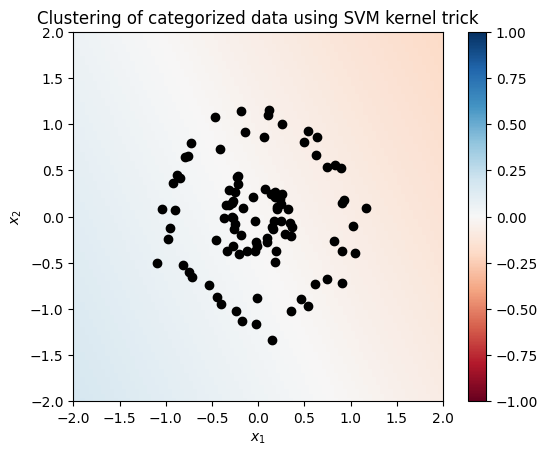

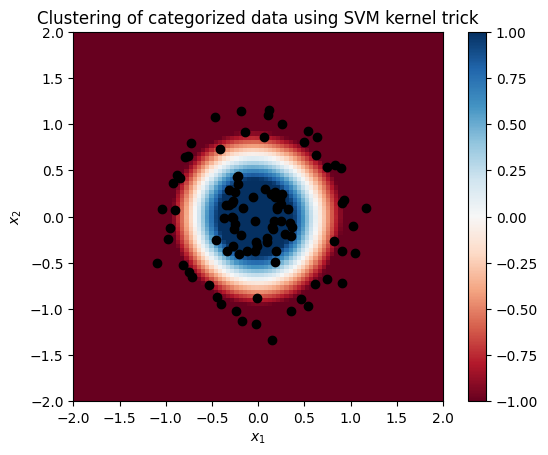

In [39]:
import sklearn.svm

x, y = sklearn.datasets.make_circles(n_samples=100, 
                                     shuffle=True, 
                                     noise=0.1, 
                                     random_state=0, 
                                     factor=0.3)
y[y==0] = -1

svm = sklearn.svm.LinearSVC(C=100)
svm.fit(x, y)
output = svm.predict(x)
value = svm.decision_function(x)

extent = (-3, 6, -3, 6)
G = 200
XX, YY = numpy.meshgrid(numpy.linspace(extent[2],extent[3],G), numpy.linspace(extent[0],extent[1],G))
pts = numpy.vstack([YY.flatten(), XX.flatten()]).T
output_pts = svm.decision_function(pts)
im = plt.imshow(output_pts.reshape((G,G)).T, vmin=-1, vmax=1, cmap='RdBu',
                extent=(extent[0], extent[1], extent[3], extent[2]))

plt.colorbar()
plt.scatter(x[:,0], x[:,1], c='black')
plt.title('Clustering of categorized data using SVM kernel trick')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

svm = sklearn.svm.SVC(kernel='rbf', gamma=1, C=1)
svm.fit(x, y)
output_pts = svm.decision_function(pts)
im = plt.imshow(output_pts.reshape((G,G)).T, vmin=-1, vmax=1, cmap='RdBu',
                extent=(extent[0], extent[1], extent[3], extent[2]))

plt.colorbar()
plt.scatter(x[:,0], x[:,1], c='black')
plt.title('Clustering of categorized data using SVM kernel trick')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

**c) [1 mark]** Here is the code to generate the overlapping dataset discussed in class.

```python
x, y = sklearn.datasets.make_blobs(centers=[[-1, -1], [1, 1]], 
                                             cluster_std=[1, 1], 
                                             random_state=0, 
                                             n_samples=200, 
                                             n_features=2)
```

Use the methodology from class to optimize $\gamma$ and $C$.  Use 20% of the data for testing.  When doing cross-validation, split your training data into 80% training and 20% validation and repeat 40 times to take the average.  Plot the cross-validation accuracy for different $C$ and $\gamma$ values.  To generate this plot, you can use code like the following, assuming your validation accuracy scores are in a matrix `accuracy`:

```python
Cs = np.logspace(-3, 5, 25)
gammas = np.logspace(-6, 3, 28)
XX, YY = np.meshgrid(np.arange(len(gammas)), np.arange(len(Cs)))
plt.contourf(XX, YY, accuracy, levels=50)
plt.colorbar()
CS = plt.contour(XX, YY, accuracy, levels=[0,0.75,0.8,0.85, 0.9, 0.95], colors='k')
plt.clabel(CS, CS.levels, inline=True, fontsize=8)
plt.xticks(np.arange(len(gammas))[::3], gammas[::3], rotation=90)
plt.yticks(np.arange(len(Cs))[::3], Cs[::3])
```

Given your final choice of $\gamma$ and $C$, re-train on all the training data, generate the same plot as in parts a and b.  Report the accuracy of the categorization on the test data.

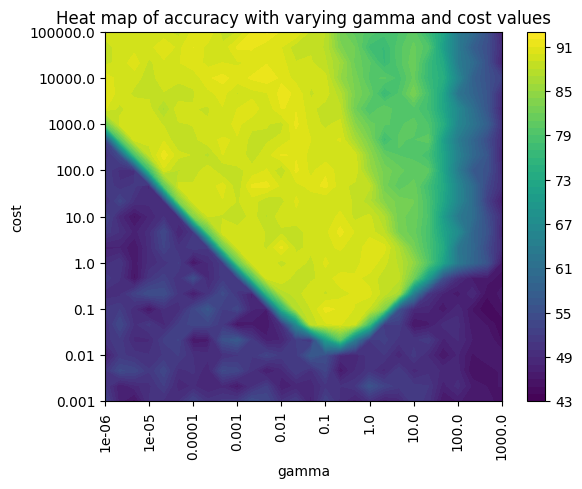

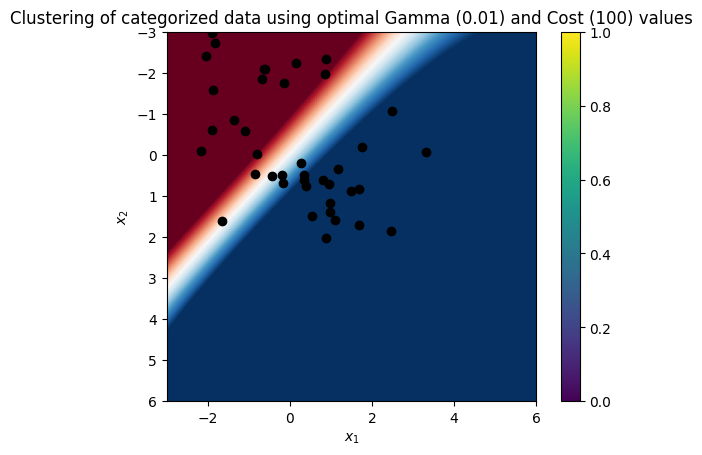

Accuracy: 95.0


In [40]:
import sklearn.svm
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt


x, y = sklearn.datasets.make_blobs(centers=[[-1, -1], [1, 1]], 
                                             cluster_std=[1, 1], 
                                             random_state=0, 
                                             n_samples=200, 
                                             n_features=2)

Cs = np.logspace(-3, 5, 25)
gammas = np.logspace(-6, 3, 28)
acc = np.zeros(40)
accuracy = np.zeros((len(Cs),len(gammas)))

X_Train, X_test, Y_Train, Y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2, shuffle=True)

for i in range(len(Cs)):
    for j in range(len(gammas)):
        svm = sklearn.svm.SVC(kernel='rbf', gamma=gammas[j], C=Cs[i])
        for h in range(40):
            X_train, X_val, Y_train, Y_val = sklearn.model_selection.train_test_split(X_Train, Y_Train, test_size=0.2, shuffle=True)
            svm.fit(X_train,Y_train)
            output = svm.predict(X_val)
            count = 0
            for k in range(len(output)):
                if output[k] == Y_val[k]:
                    count += 1
            acc[h] = count*100 / len(output)
        accuracy[i][j] = np.mean(acc)

XX, YY = np.meshgrid(np.arange(len(gammas)), np.arange(len(Cs)))
plt.contourf(XX, YY, accuracy, levels=50)
plt.colorbar()
CS = plt.contour(XX, YY, accuracy, levels=[0,0.75,0.8,0.85, 0.9, 0.95], colors='k')
plt.clabel(CS, CS.levels, inline=True, fontsize=8)
plt.xticks(np.arange(len(gammas))[::3], gammas[::3], rotation=90)
plt.yticks(np.arange(len(Cs))[::3], Cs[::3])
plt.xlabel('gamma')
plt.ylabel('cost')
plt.title('Heat map of accuracy with varying gamma and cost values')
plt.show()

svm = sklearn.svm.SVC(kernel='rbf', gamma=0.01, C=100)
svm.fit(X_Train, Y_Train)
finoutput = svm.predict(X_test)

finalacc = 0
finalc = 0
for q in range(len(Y_test)):
    if Y_test[q] == finoutput[q]:
        finalc += 1
finalacc = finalc*100/len(Y_test)

extent = (-3, 6, -3, 6)
G = 200
XX, YY = np.meshgrid(np.linspace(extent[2],extent[3],G), np.linspace(extent[0],extent[1],G))
pts = np.vstack([YY.flatten(), XX.flatten()]).T
output_pts = svm.decision_function(pts)
im = plt.imshow(output_pts.reshape((G,G)).T, vmin=-1, vmax=1, cmap='RdBu',
                extent=(extent[0], extent[1], extent[3], extent[2]))


plt.scatter(X_test[:,0], X_test[:,1], c='black')
plt.colorbar()
plt.title('Clustering of categorized data using optimal Gamma (0.01) and Cost (100) values')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()
print("Accuracy:", finalacc)